# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

# La clase METRICS: https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Se puede usar 
from sklearn.metrics import classification_report

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [2]:
url='https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv' #-Esto lo agragamos para sacarlos directo de GITHUB-

dataset = pd.read_csv(url, comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?


1. El conjunto de datos es de LA EQUIDAD DE VIVIENDA contiene informacion de línea de base y el desempeño de prestamos.
Se tiene información de 5960 Prestamos

2. Se debe predecir una variable binaria que indica si un solicitante finalmente incumplió o fue moroso. 
3. Para de cada solicitante, se registraron 12 variables de entrada.
* TARGET:  Etiqueta: 1 = El cliente incumplio - 0 = Prestamo pagado
* LOAN:    Monto de préstamo solicitado
* MORTDUE: Monto adeudado hipoteca existente
* VALUE:   Valor de la propiedad actual
* YOJ:     Años en el trabajo actual
* DEROG:   Número de informes importantes derogados
* DELINQ:  Número de líneas de crédito morosas
* CLAGE:   Antigüedad de cuenta de credito más antigua en meses
* NINQ:    Número de líneas de crédito recientes
* CLNO:    Número de líneas de crédito 
* DEBTINC: Relación deuda-ingresos
4. Imaginamos que los más determinantes son:
* La relacion deuda-ingresos (DEBTINC)
* Monto de préstamo solicitado(LOAN)


In [3]:
total=y.count()
pos=y.sum()
neg=total-pos
print(f'Totales: {total},  Target=1 :  {pos} ({round(pos/total*100,2)}%), Target=0 :  {neg} ({round(neg/total*100,2)}%)')

Totales: 1854,  Target=1 :  309 (16.67%), Target=0 :  1545 (83.33%)


## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


In [4]:
#Resolución:
#Importamos SGDCLASSIFIER para generar el modelo
from sklearn.linear_model import SGDClassifier
#Utiliza Descenso de gradiente estocástico (SGD) como optimizador

#Importamos también Standard Scaler para hacer un preprocesamiento de los datos, ya que es recomendado y make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import ParameterGrid

### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

## Precision, Recall y F1

La precision es la proporción de positivos propuestos por el modelo que fueron correctos:

$$Precision = \frac{|Train \cap Test|}{|Train|} = \frac{TP}{TP + FP}$$

La recall es la proporción de positivos correctos que fueron encontrados por el modelo:

$$Recall = \frac{|Train \cap Test|}{|Test|} = \frac{TP}{TP + FN}$$

$$F_1 = \frac{2 * Precision * Recall}{Precision + Recall}$$

In [5]:
#Iniciación del modelo:
clasificador = make_pipeline(StandardScaler(),SGDClassifier(random_state=0)) 

#Entrenamiento del modelo:
clasificador.fit(X_train, y_train) 

#Predicciones
y_pred_test=clasificador.predict(X_test)
y_pred_train=clasificador.predict(X_train)

#Reporte
#Metricas

#Función para calcular y mostrar metricas
def metricas(cl,X,y,y_pred):
  accu=cl.score(X,y)
  precision=precision_score(y, y_pred)
  recall=recall_score(y, y_pred)
  F1=f1_score(y, y_pred)
  print(f'Accuracy={round(accu,2)}  |  Precision={round(precision,2)}  |  Recall={round(recall,2)}  |   F1={round(F1,2)}\n')

  #Matriz de Confunsión
  mconf=confusion_matrix(y, y_pred)
  print(mconf)

#Impresión de las metricas
print('Conjunto de Entrenamiento\n')
metricas(clasificador,X_train,y_train,y_pred_train)
print('\nConjunto de Prueba\n')
metricas(clasificador,X_test,y_test,y_pred_test)


Conjunto de Entrenamiento

Accuracy=0.87  |  Precision=0.71  |  Recall=0.42  |   F1=0.53

[[1190   42]
 [ 146  105]]

Conjunto de Prueba

Accuracy=0.87  |  Precision=0.65  |  Recall=0.34  |   F1=0.45

[[302  11]
 [ 38  20]]


### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [6]:
#Grilla de hiperparametros:
param_grid = {
    'clasif__loss': ['hinge','log','perceptron'], #hinge= lineal SVM, log=Logistic Regresion
    'clasif__learning_rate': ['constant','optimal','invscaling','adaptive'],#Tasa de entrenamiento
    'clasif__alpha': [0.0001,0.001,0.01,0.1] #Tasa de Regularización
}

#Inicializar los modelos
scaler = StandardScaler()
clasif=SGDClassifier(eta0=0.0001,random_state=0)

  #Como queremos usar un pipeline con CV, hay que nombrar a los pasos del pipe, no automaticamente
  #make_pipeline otroga nombres a los pasos automaticamente, por eso usamos Pipeline
model = Pipeline(steps=[('scaler', scaler), ('clasif', clasif)]) 

  #GridSearchCV, hace el K_fold al otorgar un valor entero a CV, por defecto lo hace estratificado
cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)

cv.fit(X_train, y_train);

In [7]:
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']
df=pd.DataFrame(params)
df['Accuracy promedio']=mean
df['Desvio']=std
df['Ranking']=rank

In [8]:
df.sort_values(by='Ranking').head()

,clasif__alpha,clasif__learning_rate,clasif__loss,Accuracy promedio,Desvio,Ranking
16,0.001,optimal,log,0.869199,0.011605,1
28,0.010,optimal,log,0.867838,0.009843,2
27,0.010,optimal,hinge,0.866487,0.004567,3
15,0.001,optimal,hinge,0.865818,0.007099,4
34,0.010,adaptive,log,0.860420,0.007537,5


In [9]:
cv.best_params_

{'clasif__alpha': 0.001,
 'clasif__learning_rate': 'optimal',
 'clasif__loss': 'log'}

La mejor convinación es con:


* alpha: 0.001
* learning_rate: optimal
* loss: log

In [10]:
best_clasif=cv.best_estimator_
y_best_train_predict=best_clasif.predict(X_train)
y_best_test_predict=best_clasif.predict(X_test)

In [11]:
#Impresión de las metricas
print('Conjunto de Entrenamiento\n')
metricas(best_clasif,X_train,y_train,y_best_train_predict)
print('\nConjunto de Prueba\n')
metricas(best_clasif,X_test,y_test,y_best_test_predict)

Conjunto de Entrenamiento

Accuracy=0.87  |  Precision=0.73  |  Recall=0.39  |   F1=0.51

[[1196   36]
 [ 152   99]]

Conjunto de Prueba

Accuracy=0.88  |  Precision=0.7  |  Recall=0.36  |   F1=0.48

[[304   9]
 [ 37  21]]


## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


### División del Dataset

Los clasificadores por árboles de desición tienen tendencia a volverse segados si alguna de las clases domina. En nuestro caso tenemos más de un 80% de personas no morosas en el dataset original.

¿Cómo armamos un train set no sesgado?

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(
#    max_depth=5, criterion='entropy', 
    random_state=0)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

Si dejamos los valores por defecto genera un árbol de profundidad bastante grande, probablemente sobreajustado

In [36]:
#Impresión de las metricas
print('Conjunto de Entrenamiento\n')
metricas(clf,X_train,y_train,y_train_pred)
print('\nConjunto de Prueba\n')
metricas(clf,X_test,y_test,y_test_pred)

Conjunto de Entrenamiento

Accuracy=1.0  |  Precision=1.0  |  Recall=1.0  |   F1=1.0

[[1232    0]
 [   0  251]]

Conjunto de Prueba

Accuracy=0.88  |  Precision=0.62  |  Recall=0.64  |   F1=0.63

[[290  23]
 [ 21  37]]


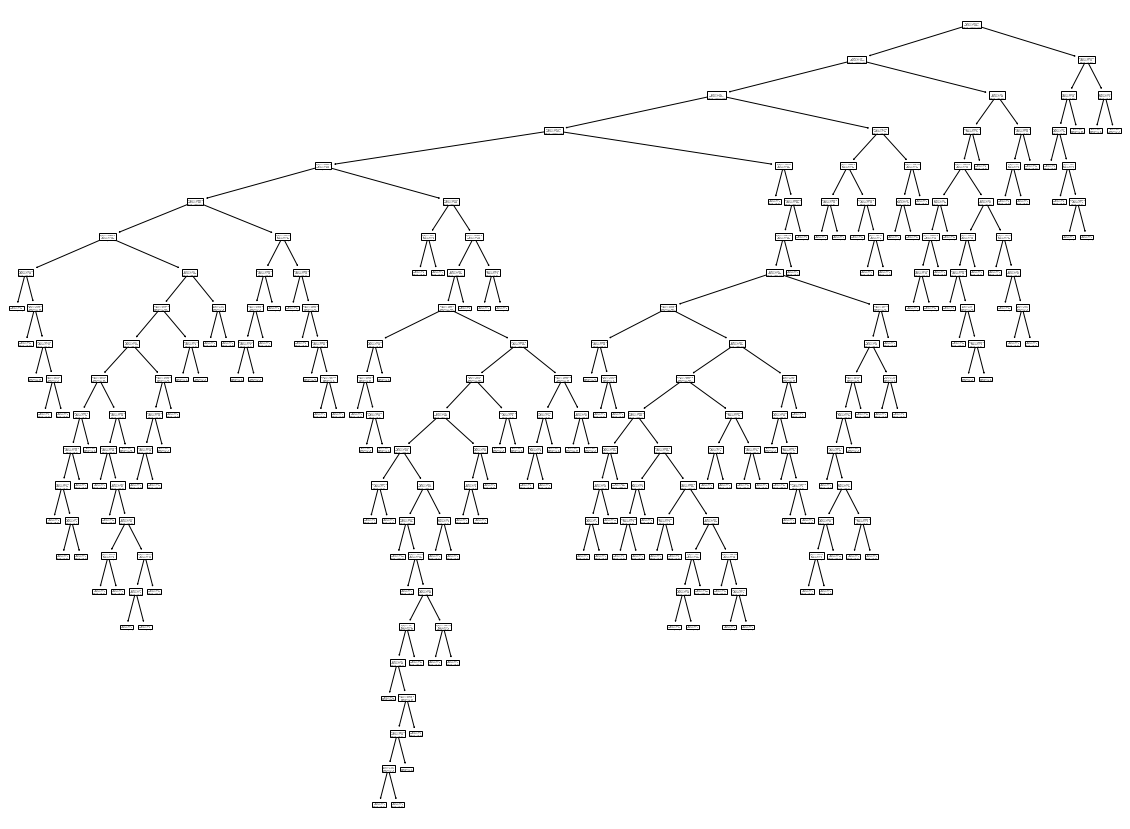

In [37]:
from sklearn.tree import plot_tree
fig,ax=plt.subplots(1,1,figsize=(20,15))
plot_tree(clf,ax=ax);

In [15]:
clf.get_depth()

22

Si fijamos una profundidad lógica:


In [38]:
clf = DecisionTreeClassifier(
    max_depth=5, criterion='entropy', 
    random_state=0)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [39]:
#Impresión de las metricas
print('Conjunto de Entrenamiento\n')
metricas(clf,X_train,y_train,y_train_pred)
print('\nConjunto de Prueba\n')
metricas(clf,X_test,y_test,y_test_pred)

Conjunto de Entrenamiento

Accuracy=0.9  |  Precision=0.9  |  Recall=0.45  |   F1=0.6

[[1220   12]
 [ 137  114]]

Conjunto de Prueba

Accuracy=0.89  |  Precision=0.79  |  Recall=0.4  |   F1=0.53

[[307   6]
 [ 35  23]]


Precisión y Accuracy mejoran, Recall y F1 empeoran

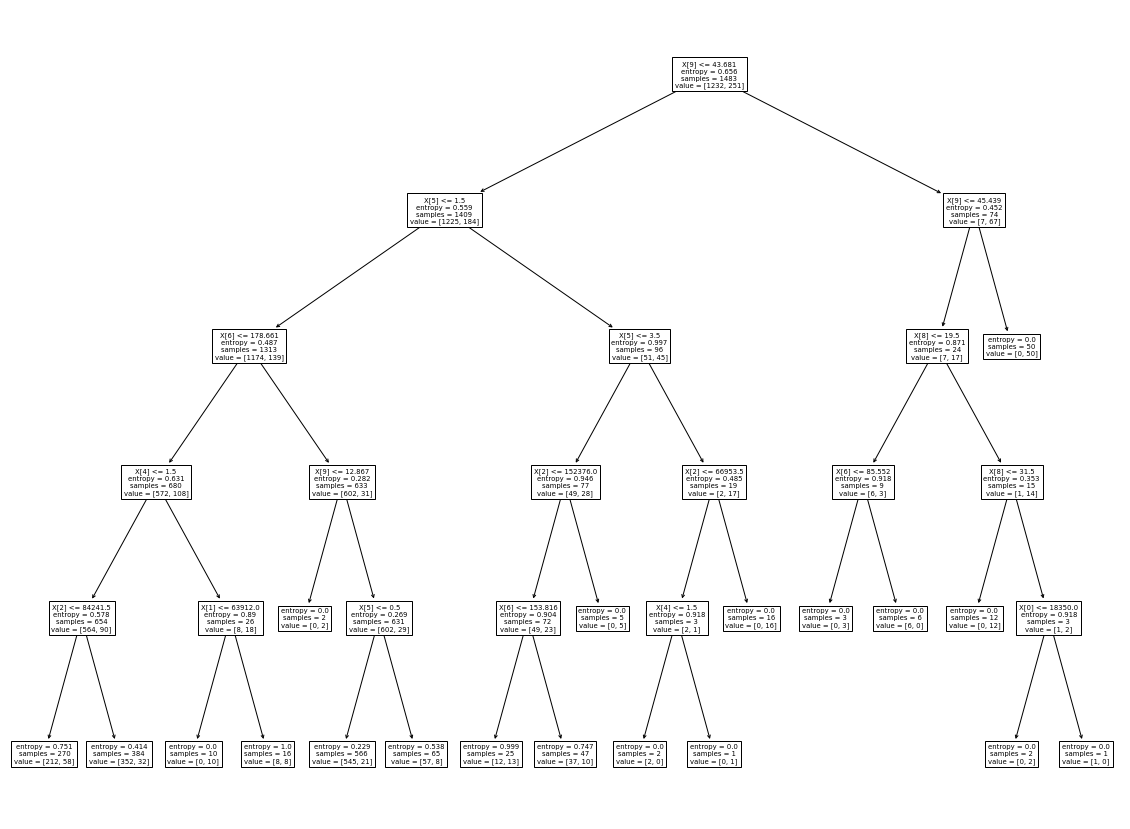

In [40]:
from sklearn.tree import plot_tree
fig,ax=plt.subplots(1,1,figsize=(20,15))
plot_tree(clf);

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://towardsdatascience.com/hyperparameters-of-decision-trees-explained-with-visualizations-1a6ef2f67edf

## Hiperparámetros
### Criterios de separación (_criterion_)
Se emplea la función de entropía o la impureza de Gini.

Se define entropía para una distribución probabilistica:

$$H(Y) = - \sum_{i=1}^k P(Y = y_i) log_2 P(Y = y_i)$$

Al tomar una desición dicotómica sobre el dataset original podemos calcular la distribución de entropía condicional:

$$H(Y|X) = - \sum_{j=1}^v P(X = x_j) \sum_{i=1}^k P(Y = y_i | X = x_j) log_2 P(Y = y_i | X = x_j)$$

Equivalentemente, 

$$H(Y|X) = \sum_{j=1}^v P(X = x_j) H(Y|X = x_j)$$

Siendo $X$ una variable categórica, pero es extensible a variables contínuas si tomamos intervalos.

Definimos la ganancia de información a la diferencia entre entropía y entropía condicional. Empleando este criterio el algoritmo calcula cuál es la variable $X$ cuya distribución de entropía hace la ganancia de información máxima. [ver link](https://bricaud.github.io/personal-blog/entropy-in-decision-trees/)

Definimos impureza de Gini como una distribución de probabilidad:

$$J(Y) = 1 - \sum_{i=1}^k P(Y=y_i)^2$$

$$J(Y|X) = 1 - \sum_{i=1}^k \sum_{j=1}^v P(Y = y_i | X = x_j)^2$$

La impureza de Gini es una medida de la frecuencia con la que un elemento elegido al azar del conjunto sería etiquetado incorrectamente si se etiquetara al azar según la distribución de etiquetas del subconjunto (para un conjunto puro es cero). Entre un nodo y el siguiente se supone que la disminución de la impureza (_impurity decrease_) es máxima. [ver link](https://towardsdatascience.com/hyperparameters-of-decision-trees-explained-with-visualizations-1a6ef2f67edf)

Si conseguimos hojas con impureza cero es muy probable que el árbol este sobreajustado, para eso existe el hiperparámetro _min_impurity_decrease_. Aumentando este valor impedimos que el arbol siga creciendo incluyendo pasos donde la ganancia de información es insignificante.

Similar _min_impurity_split_ impone un mínimo para el valor de impureza de Gini, e.g. si se fija en 0.3 cualquier nodo con impureza igual o menor a 0.3 no volvera a ser dividido.

### Criteriors (_criterion_), Separador (_splitter_) y semilla (_random_state_)

El _criterion_ es el método para evaluar la importancia de cada variable a la hora de definir la separación (las importancias se pueden consultar con el atributo 'feature_importances_'). Los resultados varían con el _random_state_, por lo que es probable que se utilice un subconjunto del dataset a la hora de definir la importancia de cada variable. [ver link](https://stackoverflow.com/questions/46756606/what-does-splitter-attribute-in-sklearns-decisiontreeclassifier-do/46759065)

El _splitter_ se utiliza para decidir qué variable y qué umbral se utiliza:

- Usando _best_, el modelo toma la variable con la mayor importancia.
- Usando _random_, el modelo toma una variable al azar empleando un muestreo aleatorio ponderado según la distribución de importancias i.e. si una variable tiene una importancia del 38%, tendrá una probabilidad del 38% de que se tome como primer criterio de separación. Esto puede ser util para mejorar la capacidad de generalización de los árboles ajustados.

### Profundidad

Un parámetro menos flexible para prevenir el sobreajuste es la profundidad. Describe el máximo número de niveles que puede tener un árbol antes de que el proceso de división se detenga.

Si no imponemos limitaciones en esto el algoritmo contínua separando hasta que todas las hojas son conjuntos puros. Como demostramos antes, esto puede dar árboles masivos de hasta 22 niveles y evidentemente sobreajustados.

### Hojas

El parámetro _min_samples_leaf_ limita el número mínimo de elementos que puede haber en una hojas. Sin este límite el arbol puede separar hasta hojas que representen grupos con uno o dos elementos, lo que también es un síntoma de sobreajuste.

Otro parámetro _max_leaf_nodes_ limita el número máximo de hojas que puede tener el árbol.




## _Pruning_

Una de las cuestiones que se plantean en un algoritmo de árbol de decisión es el tamaño óptimo del árbol final. Un árbol demasiado grande corre el riesgo de sobreajustar los datos de entrenamiento y de generalizar mal las nuevas muestras. Un árbol pequeño podría no capturar información estructural importante sobre el espacio muestral. Sin embargo, es difícil saber cuándo debe detenerse un algoritmo de árbol, ya que es imposible saber si la adición de un solo nodo adicional reducirá drásticamente el error. 

Este problema se conoce como efecto horizonte. Una estrategia habitual es hacer crecer el árbol hasta que cada nodo contenga un pequeño número de instancias y, a continuación, "podar" para eliminar los nodos que no proporcionan información adicional. [ver link](https://en.wikipedia.org/wiki/Decision_tree_pruning).

El _pruning_ (literalmente **poda** en inglés) es una técnica de compresión de datos en los algoritmos de aprendizaje automático y de búsqueda que reduce el tamaño de los árboles de decisión eliminando las secciones del árbol que no son críticas o redundan al clasificar las instancias. Es una forma de reducir el sobreajuste, reduciendo la complejidad del clasificador final.

### _Cost complexity pruning_

Este método encuentra recursivamente el nodo con el "enlace más débil". Se genera una serie de árboles $T_0 \dots T_m$ donde $T_0$ es el árbol inicial y $T_m$ es solo la raíz. El árbol $i$ se obtiene de tomar una rama del árbol $i-1$ y volverla una hoja. 

La desición se toma mediante el siguiente razonamiento:

- Definimos el la probabilidad de un árbol $T$ de cometer un error sobre un dataset $S$ como $R(T,S)$.
- Se selecciona aquel sub arbol $t$ con $T_{i-1}= prune(T_i,t)$ tal que minimize $\frac{R(prune(T,t),S) - R(T,S)}{|leaves(T)|-|leaves(prune(T,t))|}$

Para una deducción completa de la función de error R(T) [ver link](https://online.stat.psu.edu/stat508/lesson/11/11.8).

Sin embargo $R(T)$ no es una buena medida para seleccionar un subárbol porque es un estimador sesgado: siempre favorece a los árboles más grandes. 

En la práctica se agrega una penalización de complejidad a la función de error:

$R_\alpha(T) = R(T) + \alpha|T|$

Donde $|T|$ representa el número de hojas o nodos terminales del árbol $T$. 

El término de penalización favorece a los árboles más pequeños. Así, la función de error se caracteriza por un parámetro de complejidad alfa $\alpha \geq 0$. Este parámetro se ajusta con _ccp_alpha_ (_Cost Complexity Pruning - Alpha_) en SciKit Learn.

Para emplear el método de pruning es importante tener un árbol suficientemente grande. No tiene sentido aplicar pruning si por ejemplo se emplea un parámetro de profundidad máxima.

¿Qué valores de alpha vale la pena probar? _DecisionTree_ en sklearn tiene una función llamada _cost_complexity_pruning_path_, que da los alfa efectivos de los subárboles durante la poda y también las impurezas correspondientes. En otras palabras, podemos utilizar estos valores de alfa para podar nuestro árbol de decisión. Para un ejemplo [ver link](https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/).


### NOTA! Lo que sigue no es la grilla de parámetros es simplemente un resumen de la documentación de DecisionTreeClassifier de SciKitLearn.

In [20]:
#param_grid_tree = {
 # 'criterion': ,
  # The function to measure the quality of a split: “gini” for the Gini impurity and “entropy” for the information gain.

  #'splitter': ,
  # The strategy used to choose the split at each node: “best” to choose the best split and “random” to choose the best random split.

  #'max_depthint': ,
  # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
  
 # 'min_samples_split': ,
  # int or float, default=2. 
  # The minimum number of samples required to split an internal node: If int, then consider min_samples_split as the minimum number.
  # If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

  #'min_samples_leaf': ,
  # int or float, default=1
  # The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least 
  # min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
  # If int, then consider min_samples_leaf as the minimum number.
  # If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

 # 'min_weight_fraction_leaf': ,
  # float, default=0.0
  # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. 
  # Samples have equal weight when sample_weight is not provided.

  #'max_features': ,
  # int, float or {“auto”, “sqrt”, “log2”}, default=None
  # The number of features to consider when looking for the best split: If int, then consider max_features features at each split.
  # If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
  # If “auto”, then max_features=sqrt(n_features).
  # If “sqrt”, then max_features=sqrt(n_features).
  # If “log2”, then max_features=log2(n_features).
  # If None, then max_features=n_features.
  # Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect 
  # more than max_features features.

  #'random_state': ,
  # int, RandomState instance or None, default=None
  # Controls the randomness of the estimator. The features are always randomly permuted at each split, even if splitter is set to "best". 
  # When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. 
  # But the best found split may vary across different runs, even if max_features=n_features. 
  # That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. 
  # To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer. See Glossary for details.

  #'max_leaf_nodes': ,
  # int, default=None
  # Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. 
  # If None then unlimited number of leaf nodes.

  #'min_impurity_decrease': ,
  # float, default=0.0
  # A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
  # The weighted impurity decrease equation is the following: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)
  # where N is the total number of samples, N_t is the number of samples at the current node, N_t_L is the number of samples in the left child, 
  # and N_t_R is the number of samples in the right child. N, N_t, N_t_R and N_t_L all refer to the weighted sum, if sample_weight is passed.

  #'min_impurity_split': ,
  # float, default=0
  # Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

  #'class_weight': ,
  # dict, list of dict or “balanced”, default=None
  # Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. 
  # For multi-output problems, a list of dicts can be provided in the same order as the columns of y.
  # Note that for multioutput (including multilabel) weights should be defined for each class of every column in its own dict. 
  # For example, for four-class multilabel classification weights should be [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of [{1:1}, {2:5}, {3:1}, {4:1}].
  # The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
  # For multi-output, the weights of each column of y will be multiplied.
  # Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

  #'ccp_alpha': ,
  # non-negative float, default=0.0
  # Complexity parameter used for Minimal Cost-Complexity Pruning. 
  # The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. 
  # By default, no pruning is performed. 
  #}

Para el Grid Search empleamos los dos criterios de separación, los tipos de separador, distintos valores de profundidad en el rango que se determinó en el ejercicio anterior:

In [41]:
#Grilla de hiperparametros:
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(5,22)),
}

#Inicializar los modelos
clf_tree = DecisionTreeClassifier(random_state = 500)

#GridSearchCV, hace el K_fold al otorgar un valor entero a CV, por defecto lo hace estratificado
cv = GridSearchCV(clf_tree, param_grid_tree, scoring='accuracy', cv=5)

cv.fit(X_train, y_train);

In [42]:
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']
df=pd.DataFrame(params)
df['Accuracy promedio']=mean
df['Desvio']=std
df['Ranking']=rank

In [43]:
df.sort_values(by='Ranking')

,criterion,max_depth,splitter,Accuracy promedio,Desvio,Ranking
13,gini,11,random,0.882676,0.008012,1
23,gini,16,random,0.882016,0.022773,2
15,gini,12,random,0.882012,0.014181,3
21,gini,15,random,0.880647,0.007886,4
9,gini,9,random,0.879980,0.019699,5
...,...,...,...,...,...,...
65,entropy,20,random,0.855037,0.014491,64
61,entropy,18,random,0.855028,0.008180,65
29,gini,19,random,0.854361,0.029868,66
67,entropy,21,random,0.850316,0.019293,67


## _Pruning_

Entrenamos un árbol sin límite de tamaño para calcular los valore sde alpha para el pruning (ver explicación en el apartado Pruning más arriba)

In [44]:
tree = DecisionTreeClassifier(random_state = 500)
tree.fit(X_train, y_train)
path = tree.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']

alphas

array([0.        , 0.00044789, 0.00052797, 0.00056192, 0.00057798,
       0.00060688, 0.00062244, 0.00062614, 0.00063081, 0.0006417 ,
       0.00064734, 0.00064933, 0.00066499, 0.00067094, 0.00073593,
       0.00089908, 0.00089908, 0.00089908, 0.00099307, 0.00101146,
       0.00101146, 0.00101146, 0.00102752, 0.00107889, 0.00110341,
       0.00112385, 0.00114114, 0.00114333, 0.00115411, 0.00115596,
       0.00116307, 0.00118004, 0.00120591, 0.00124038, 0.00124488,
       0.00124488, 0.00127216, 0.00129358, 0.00129867, 0.0013832 ,
       0.00151424, 0.0015278 , 0.00167367, 0.00169185, 0.00196513,
       0.0019918 , 0.00200536, 0.00202293, 0.00207813, 0.00220957,
       0.00234864, 0.00244964, 0.00246576, 0.00246897, 0.00254657,
       0.00278642, 0.00305968, 0.00338883, 0.00339215, 0.00357416,
       0.00401531, 0.00429797, 0.00579716, 0.00897726, 0.01588741,
       0.05692302])

Estos alphas se obtienen con los parámetros por defecto del clasificador, pero son un buen ejemplo para hacer un grid search.

Tomamos para la grilla de parámetros solamente los distintos criterios, los dos sistemas de separación y los alphas:

In [45]:
#Grilla de hiperparametros:

param_grid_prune = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'ccp_alpha': alphas,
}

#Inicializar los modelos
clf_tree = DecisionTreeClassifier(random_state = 500)

  #GridSearchCV, hace el K_fold al otorgar un valor entero a CV, por defecto lo hace estratificado
cv = GridSearchCV(clf_tree, param_grid_prune, scoring='accuracy', cv=5)

cv.fit(X_train, y_train);

In [46]:
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']
df=pd.DataFrame(params)
df['Accuracy promedio']=mean
df['Desvio']=std
df['Ranking']=rank

In [47]:
df.sort_values(by='Ranking')

,ccp_alpha,criterion,splitter,Accuracy promedio,Desvio,Ranking
165,0.001528,gini,random,0.878640,0.013853,1
161,0.001514,gini,random,0.878640,0.013853,1
169,0.001674,gini,random,0.878640,0.012292,1
181,0.001992,gini,random,0.877955,0.007434,4
157,0.001383,gini,random,0.877289,0.009987,5
...,...,...,...,...,...,...
253,0.008977,gini,random,0.836814,0.006325,260
259,0.015887,entropy,random,0.836141,0.008453,261
257,0.015887,gini,random,0.830749,0.001259,262
261,0.056923,gini,random,0.830749,0.001259,262


**Mejor Estimador**

In [51]:
best_tree=cv.best_estimator_
best_tree

DecisionTreeClassifier(ccp_alpha=0.0015142373803693318, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=500,
                       splitter='random')

**Metricas**

In [53]:
#Impresión de las metricas
print('Conjunto de Entrenamiento\n')
metricas(best_tree,X_train,y_train,y_train_pred)
print('\nConjunto de Prueba\n')
metricas(best_tree,X_test,y_test,y_test_pred)

Conjunto de Entrenamiento

Accuracy=0.91  |  Precision=0.9  |  Recall=0.45  |   F1=0.6

[[1220   12]
 [ 137  114]]

Conjunto de Prueba

Accuracy=0.9  |  Precision=0.79  |  Recall=0.4  |   F1=0.53

[[307   6]
 [ 35  23]]


Los resultados son apenas mejores que el arbol planteado anterirormente con profundidad de 5

**Impresion del arbol**

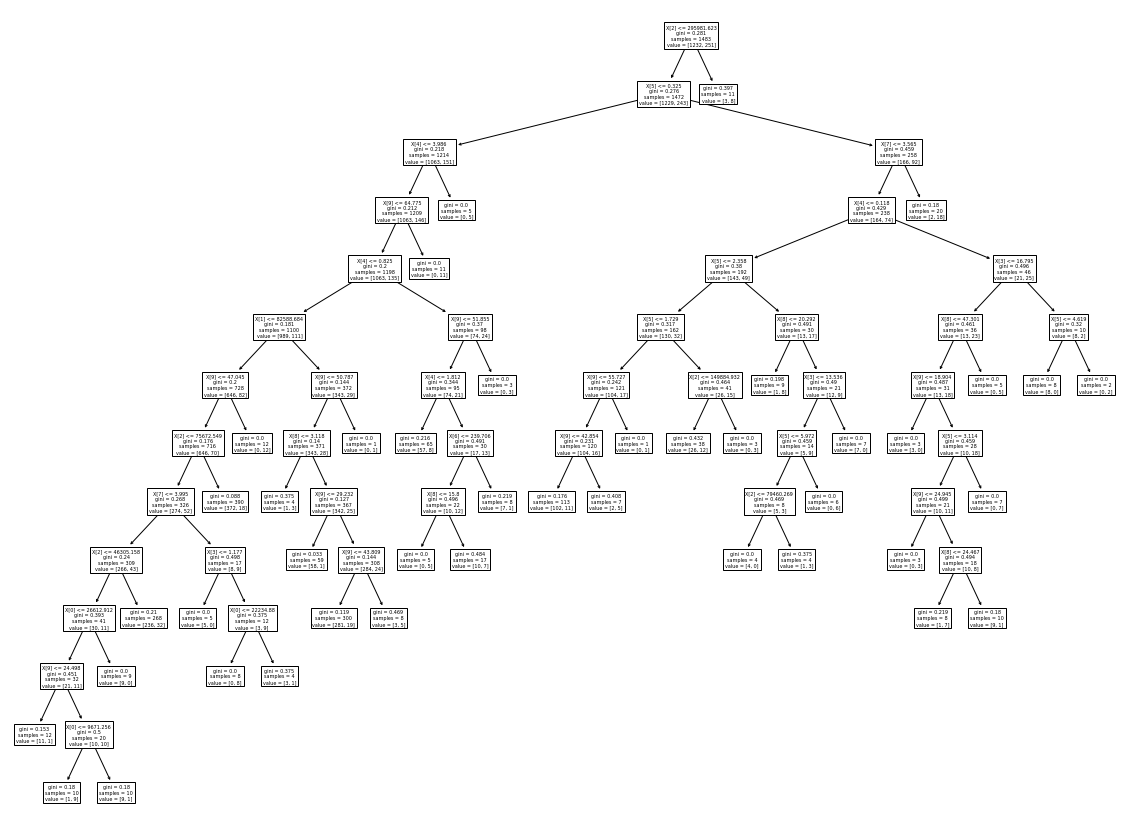

In [52]:
fig,ax=plt.subplots(1,1,figsize=(20,15))
plot_tree(best_tree);